In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import textwrap

from utils import *
from matplotlib import pyplot as plt
from pymongo import MongoClient

### Parâmetros do Matplot, Seaborn e Pandas

In [2]:
%matplotlib inline
pd.options.mode.chained_assignment = None 
plt.rcParams['figure.figsize'] = [10, 5]
sns.set(rc={'figure.figsize':(15,10)})

pd.set_option('display.max_columns', 50)

### Recuperação de Datasets do MongoDB

In [3]:
df_infracoes_der_2018_2019 = mongo_to_dataframe("infracoes_der_2018_2019")

In [3]:
df_infracoes_prf_2010_2018 = mongo_to_dataframe("infracoes_prf_2010_2018")

In [4]:
def plota_infracoes_veiculos(df, lista_tipos_veiculos, label_tipo_veiculo, label_qtd_infracoes, label_tipo_infracao):
    for tipo_veiculo in lista_tipos_veiculos:
        infracoes = df.loc[df[label_tipo_veiculo] == tipo_veiculo]
        infracoes = infracoes.groupby(label_tipo_infracao).count().reset_index().sort_values(label_qtd_infracoes, ascending=False)
        infracoes_comuns = infracoes.iloc[[i for i in range(0, 15)]]
        # Quebra linha de descricoes muito longas     
        for descricao in infracoes_comuns[label_tipo_infracao]:
            if len(descricao) > 100:
                desc_linha_quebrada = "\n".join(textwrap.wrap(descricao,70))
                infracoes_comuns[label_tipo_infracao] = infracoes_comuns[label_tipo_infracao].str.replace(descricao, desc_linha_quebrada)

        grafico = sns.barplot(y = infracoes_comuns[label_tipo_infracao],
                              x = infracoes_comuns[label_qtd_infracoes],
                              data = infracoes_comuns,
                              palette = "Blues_d")

        n_infracoes = infracoes_comuns[label_qtd_infracoes].reset_index().drop(columns='index')
        total = infracoes[label_qtd_infracoes].sum()
        i = 0
        for p in grafico.patches:
            percentage = '{:.1f}%'.format(100 * n_infracoes[label_qtd_infracoes][i]/total)
            x = p.get_x() + p.get_width() + 5
            y = p.get_y() + p.get_height() / 1.5
            grafico.annotate(percentage, (x, y))
            i += 1

        plt.title("Os 15 tipos mais comuns de infração cometidos por veículos do tipo " + tipo_veiculo.lower())
        plt.xlabel("Quantidade")
        plt.ylabel("")
        plt.show()

### Infrações DER

In [5]:
dict_veiculos = {'AUTOMOVEL': 'AUTOMÓVEL',
                 'CAMINHONET': 'CAMINHONETE',
                 'CAMINHAO': 'CAMINHÃO',
                 'C. TRATOR': 'CAMINHÃO TRATOR',
                 'CAMINHAO TRATOR': 'CAMINHÃO TRATOR',
                 'ONIBUS': 'ÔNIBUS',
                 'MICROONIBU': 'MICRO-ÔNIBUS',
                 'MICROÔNIBUS': 'MICRO-ÔNIBUS',
                 'MICROONIBUS': 'MICRO-ÔNIBUS',
                 'MOTOCICLET': 'MOTOCICLETA',
                 'UTILITARIO': 'UTILITÁRIO',
                 'S.REBOQUE': 'SEMI-REBOQUE',
                 'MOTOR CASA': 'MOTOR-CASA'}

df_infracoes_der_2018_2019.descricao = df_infracoes_der_2018_2019.descricao.str.strip()
df_infracoes_der_2018_2019.tipo_veiculo = df_infracoes_der_2018_2019.tipo_veiculo.str.upper()
df_infracoes_der_2018_2019.tipo_veiculo = df_infracoes_der_2018_2019.tipo_veiculo.str.strip()
df_infracoes_der_2018_2019.tipo_veiculo = df_infracoes_der_2018_2019.tipo_veiculo.replace(dict_veiculos)
df_infracoes_der_2018_2019.tipo_veiculo.value_counts()

AUTOMÓVEL            581265
CAMINHONETE           65717
CAMIONETA             50535
MOTOCICLETA           40494
UTILITÁRIO            27766
CAMINHÃO              16086
CAMINHÃO TRATOR        9363
MICRO-ÔNIBUS           4185
SEMI-REBOQUE           3870
ÔNIBUS                 3598
MOTONETA               2634
NULL                   1119
REBOQUE                 985
TRICICLO                 57
CICLOMOTOR               55
MOTOR-CASA               16
CHASSI PLATAFORMA         5
INEXISTENTE               5
CHARRETE                  4
SIDE-CAR                  4
TR RODAS                  3
TR MISTO                  2
BONDE                     1
CARRO-DE-MÃO              1
QUADRICICLO               1
BICICLETA                 1
TR ESTEIRAS               1
Name: tipo_veiculo, dtype: int64

In [6]:
tipos_veiculos_drop = ['NULL', 'REBOQUE', 'TRICICLO', 'CICLOMOTOR', 'MOTOR-CASA', 'INEXISTENTE',
                       'CHASSI PLATAFORMA', 'CHARRETE', 'SIDE-CAR', 'TR RODAS', 'TR MISTO', 'TR ESTEIRAS',
                       'CARRO-DE-MÃO', 'BICICLETA', 'BONDE', 'QUADRICICLO']
index_drop = df_infracoes_der_2018_2019[df_infracoes_der_2018_2019['tipo_veiculo'].isin(tipos_veiculos_drop)].index
df_infracoes_der_2018_2019.drop(index_drop , inplace=True)
df_infracoes_der_2018_2019.tipo_veiculo.value_counts()

AUTOMÓVEL          581265
CAMINHONETE         65717
CAMIONETA           50535
MOTOCICLETA         40494
UTILITÁRIO          27766
CAMINHÃO            16086
CAMINHÃO TRATOR      9363
MICRO-ÔNIBUS         4185
SEMI-REBOQUE         3870
ÔNIBUS               3598
MOTONETA             2634
Name: tipo_veiculo, dtype: int64

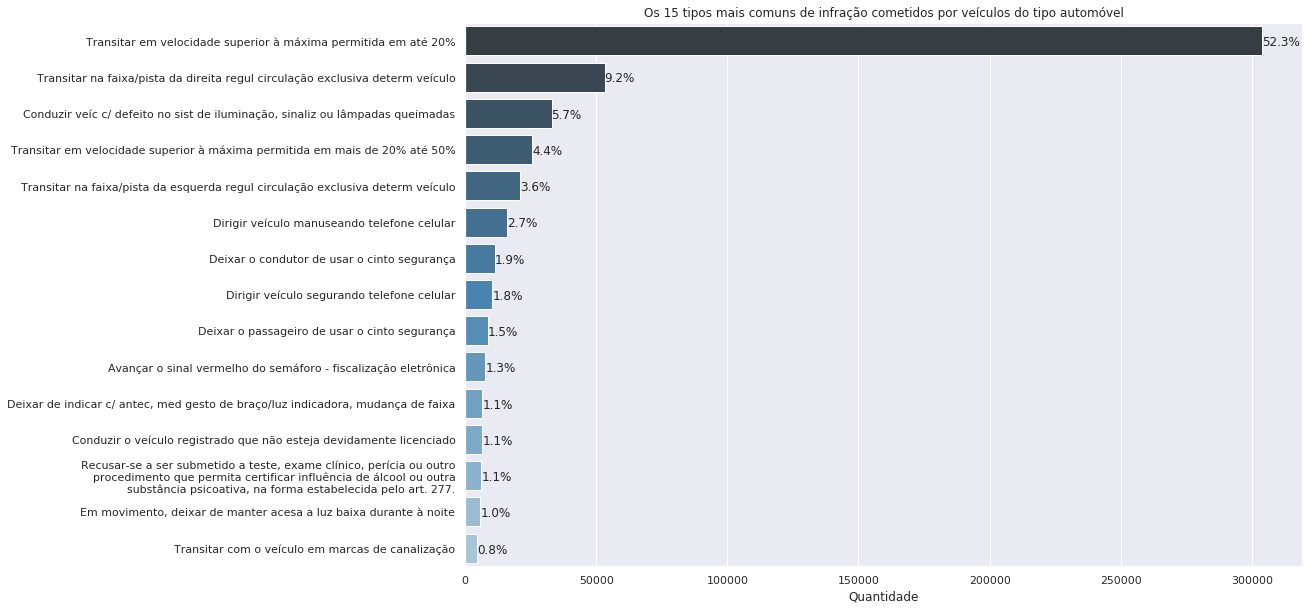

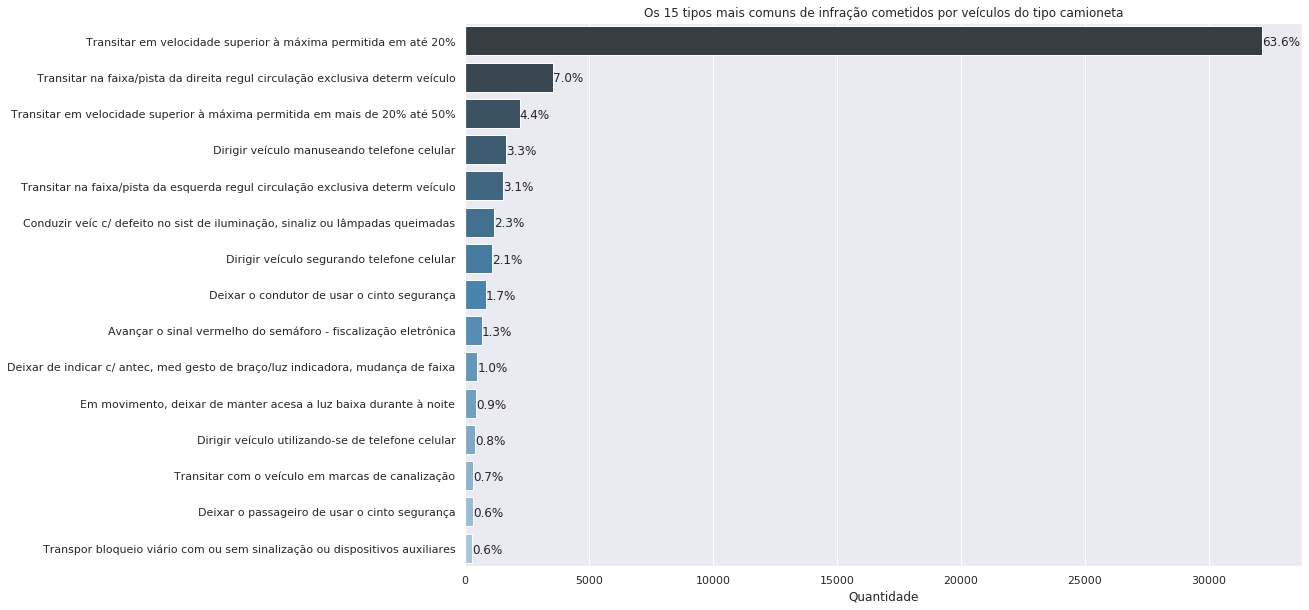

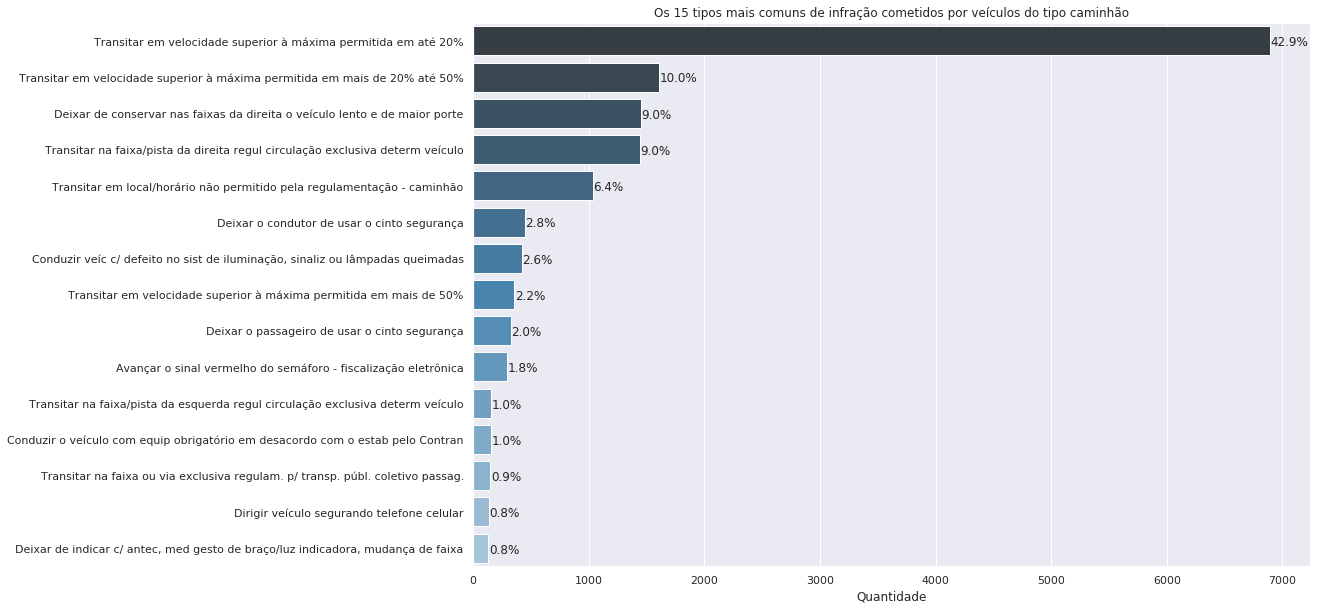

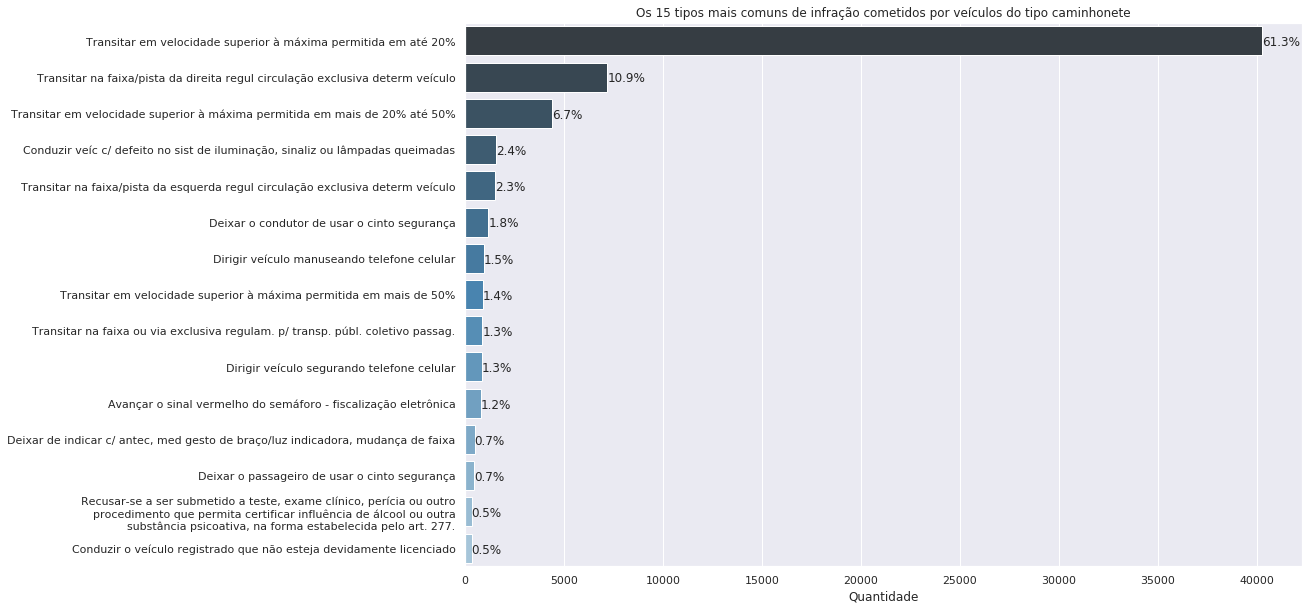

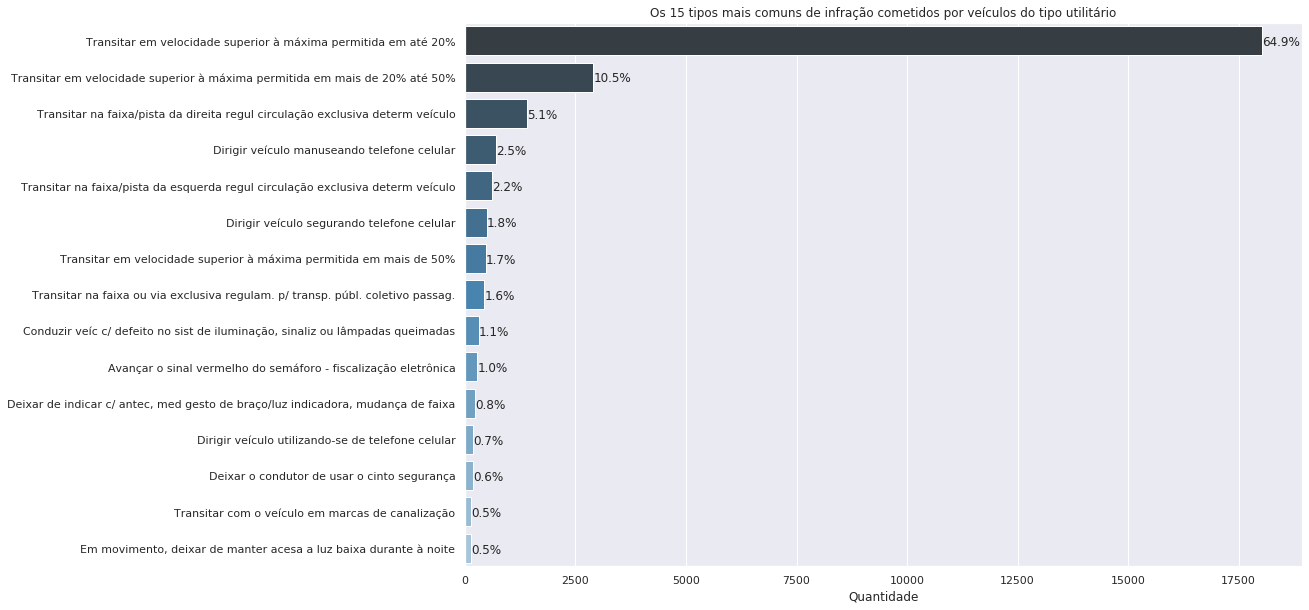

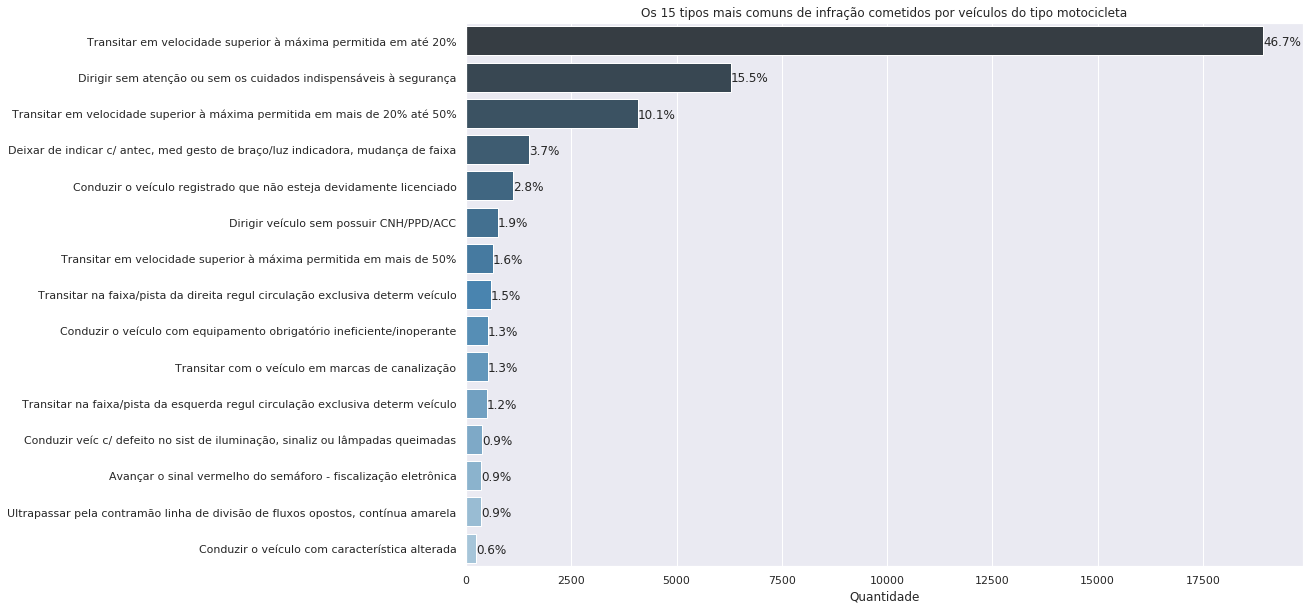

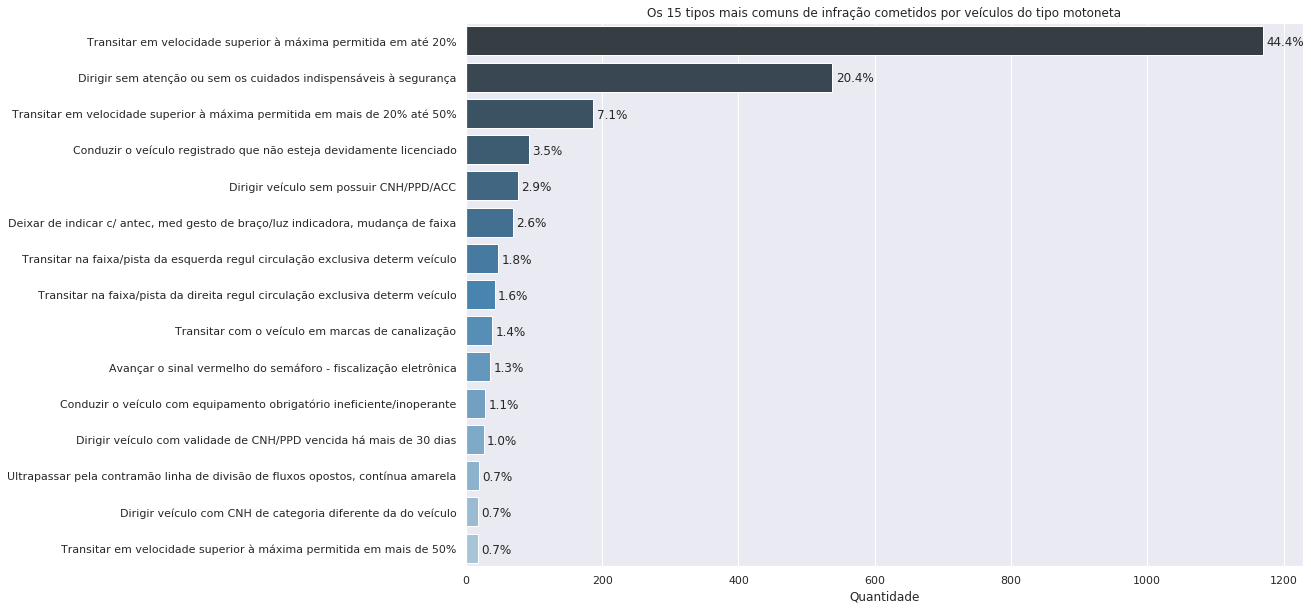

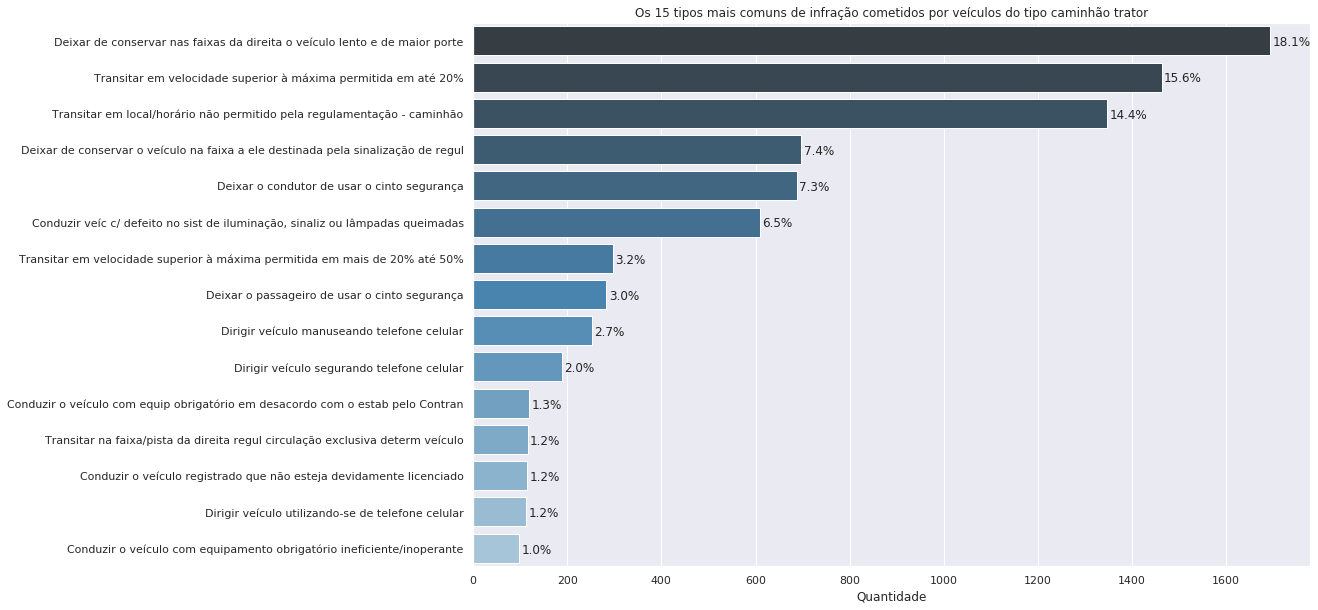

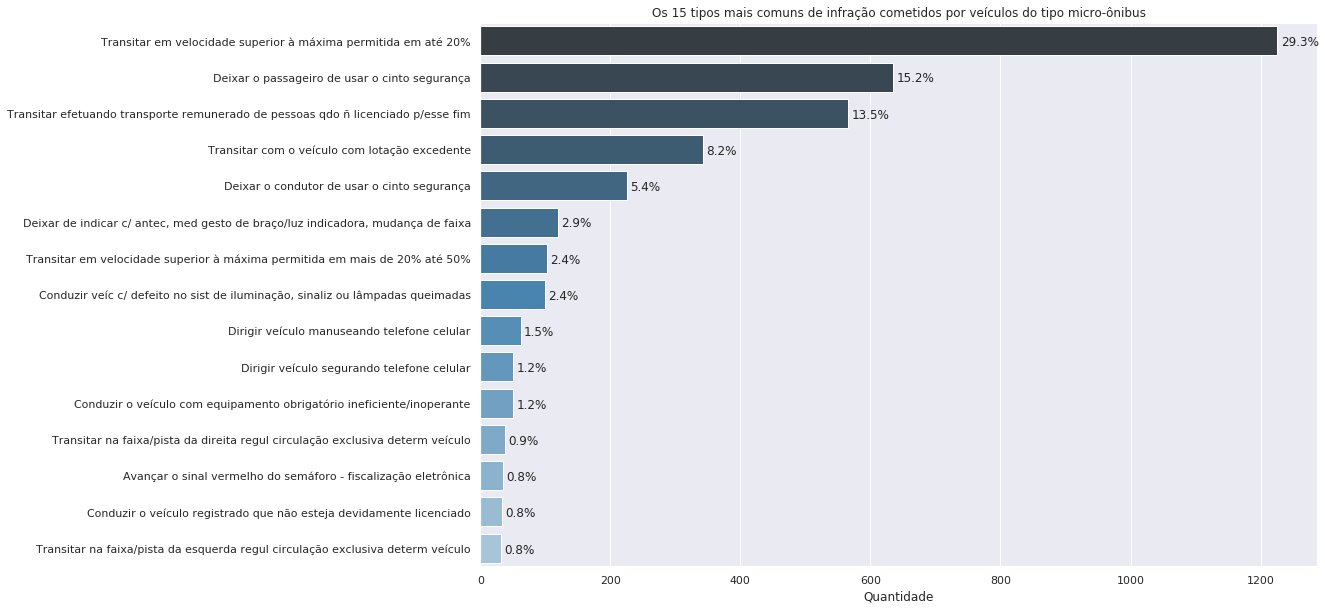

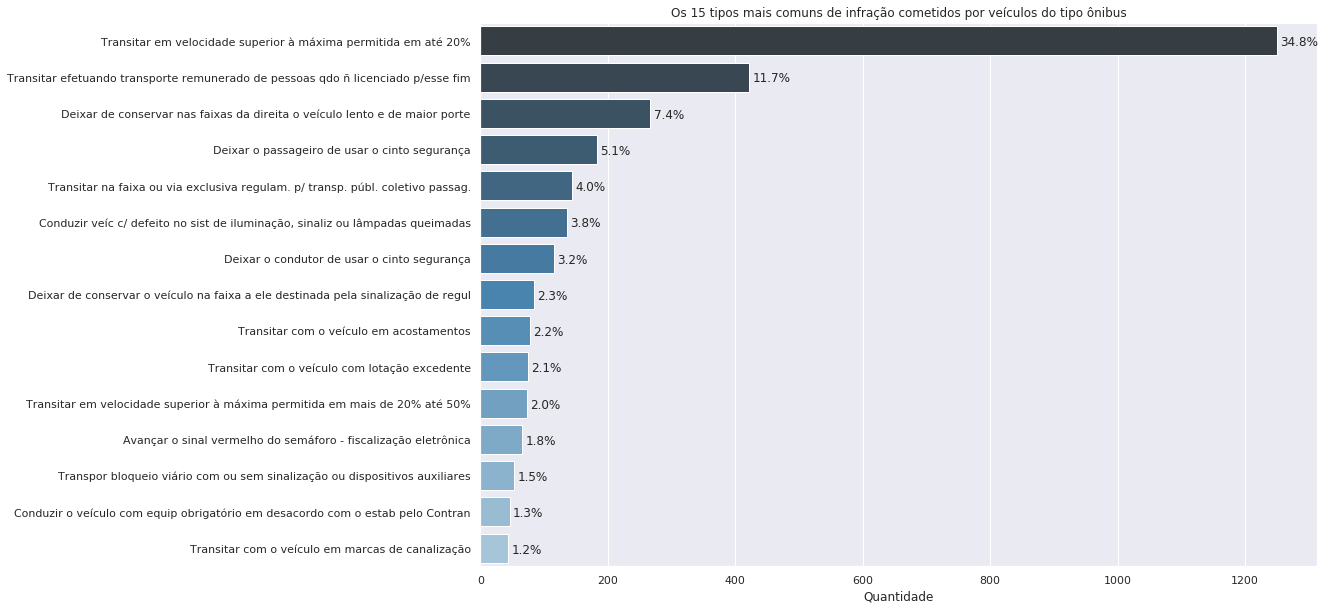

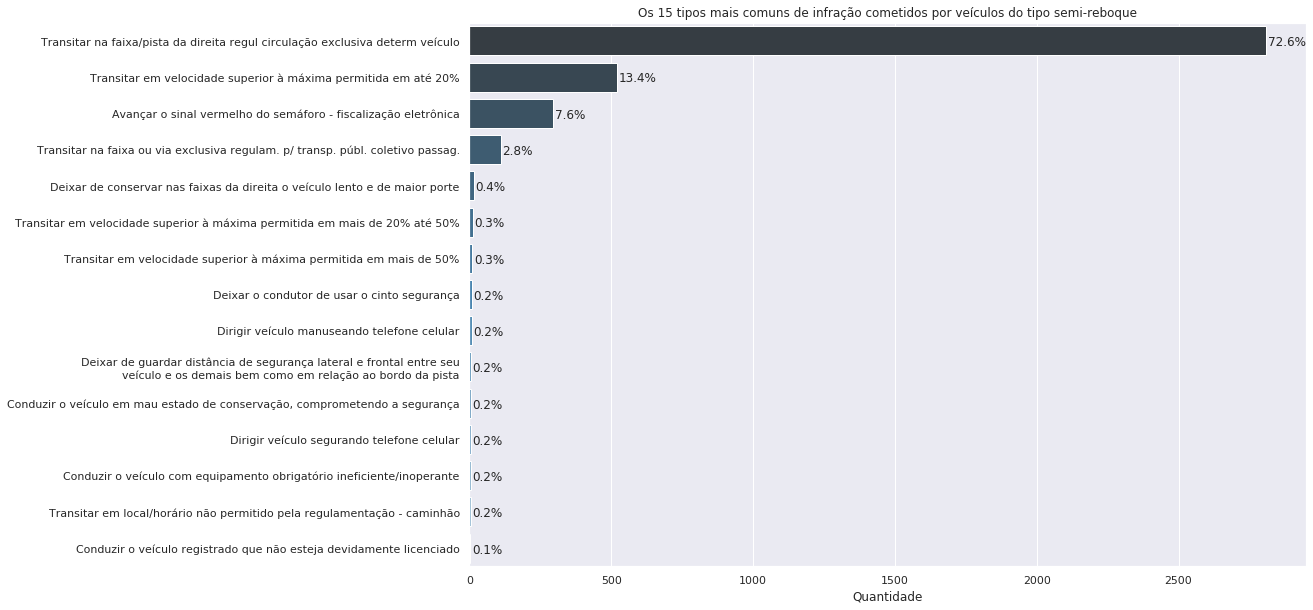

In [7]:
lista_tipos_veiculos = df_infracoes_der_2018_2019.tipo_veiculo.unique().tolist()
lista_tipos_veiculos.pop() # Retira o ultimo valor da lista, que e nan

plota_infracoes_veiculos(df=df_infracoes_der_2018_2019,
                         lista_tipos_veiculos=lista_tipos_veiculos,
                         label_tipo_veiculo='tipo_veiculo',
                         label_qtd_infracoes='tipo_infracao',
                         label_tipo_infracao='descricao')

### Observações
Para esse experimento, foram selecionados apenas tipos de veículos que possuíssem mais de 2000 amostras. Além disso, os gráficos mostram apenas os 15 tipos de infrações mais comuns de acordo com o tipo do veículo, já que são as mais relevantes. As definições dos tipos de veículos podem ser encontrados no [Anexo I](https://www.ctbdigital.com.br/arquivos/anexo_I.pdf) do Código de Trânsito Brasileiro.  
  
No geral, existem certos tipos de infrações que aparecem no ranking da maioria dos diferentes tipos de veículos, como de ultrapassar a velocidade máxima, transitar em faixa exclusiva, falta do cinto de segurança e uso do celular. Entretanto, existem tipos de infrações característicos de alguns tipos de veículos, devido as suas peculiaridades.  

É possível perceber que veículos com características semelhantes (como motocicletas e motonetas ou caminhonetes e camionetas) tendem a seguir um padrão parecido nos tipos de infrações mais comuns. Já nas classes mais distintas, há certas diferenças, tanto nesse ranking de infrações, quanto nas proporções dos tipos de infrações.  

- __Automóvel:__ Por ser a classe com mais registros, é a que mais se assemelha ao comparar com o panorama geral, tendo como infrações mais comuns as de velocidade (até 20% e entre 20% e 50% acima do permitido), transitar em faixa exclusiva para determinado veículo e defeitos de iluminação/sinalização do veículo. Outras infrações típicas dos automóveis é de dirigir utilizando celular, o condutor ou passageiro sem cinto de segurança e avançar o sinal vermelho.  
- __Camioneta/Caminhonete:__ Se assemelha com o que é visto com os automóveis, porém a porcentagem de infrações de velocidade (até 20% acima da máxima permitida) é ligeiramente maior, sendo que nessas categorias ultrapassa os 60% do total. Essa semelhança pode ser explicada pelas pessoas usarem esses tipos de veículos como automóveis, mesmo que a definição deles seja de veículos de carga.
- __Caminhão:__ A primeira diferença para esse tipo de veículo são infrações relacionadas ao porte do veículo, como deixar de conservar nas faixas da direita veículo lento ou de maior porte e transitar em local/horário não permitido pela regulamentação. Além disso, o segundo tipo de infração mais comum é de transitar entre 20% e 50% acima da velocidade máxima, contabilizando 10% do total de infrações, o que só acontece nos utilitários.
- __Utilitário:__ Por ser classificado como um veículo misto caracterizado por sua versatilidade, os tipos de infração mais comuns são semelhantes aos vistos nos automóveis, camionetas e caminhonetes. A maior discrepância é de infrações de velocidade entre 20% e 50% acima da máxima permitida, que chega a 10,5% das ocorrências, sendo a segunda mais comum para os utilitários.  
- __Motocicletas/Motonetas__: Uma das principais características desses tipos de veículos são as infrações de dirigir sem atenção ou sem os cuidados indispensáveis a segurança, o que pode gerar mais acidentes. Há também alto índice de infrações por conduzir o veículo sem estar devidamente licenciado, sem possuir CNH/PPD/ACC e por ultrapassar o sinal vermelho, sendo que essas infrações podem ser relacionadas com a irresponsabilidade por parte dos motociclistas.
- __Caminhão Trator:__ Por possuir características semelhantes com caminhões, possui índices de infrações relacionados ao porte do veículo, sendo que a mais comum é de deixar de conservar nas faixas da direita o veículo lento e de maior porte, além de transitar em local/horário não permitido e deixar de transitar na faixa a ele destinada pela sinalização. É interessante observar que esse tipo de veículo é o que tem a distribuição dos tipos de infração mais regular, sendo possível dividir em quatro *clusters* com porcentagens parecidas.  
- __Semi-Reboque:__ Mesmo sendo um veículo sem tração própria (se apoia em uma unidade tratora ou é a ela ligado por meio de articulação), possui uma distribuição bastante discrepante dos outros tipos de veículos, sendo que pouco mais de 70% das infrações registradas são por transitar na faixa exclusiva de determinado veículo, podendo estar relacionado a desinformação ou engano dos motoristas. Também possui uma porcentagem relevante por avanço de sinal vermelho. Ao contrário do caminhão trator, é a classe com a distribuição mais desigual dos tipos de infração.
- __Ônibus/Micro-ônibus:__ Como são veículos de transporte de passageiros, os tipos de infração mais comuns estão relacionados com isso, vide os altos índices de infração por deixar o passageiro de usar cinto de segurança, efetuar transporte remunerado de pessoas quando não licenciado para esse fim (conhecido como "transporte pirata") e transitar com lotação excedente. Diferente das outras classes há poucos registros por transitar na faixa/pista exclusiva para determinado veículo, pois a maior parte delas é justamente para o trânsito de veículos de transporte de passageiro.

### Infrações PRF

In [10]:
df_infracoes_prf_2010_2018.especie.value_counts()

PASSAGEIRO    230650
CARGA          36526
MISTO          22303
ESPECIAL       13218
TRAÇÃO          4812
COLEÇÃO            3
COMPETIÇÃO         3
Name: especie, dtype: int64

In [14]:
index_drop = df_infracoes_prf_2010_2018[df_infracoes_prf_2010_2018['especie'].isin(['COLEÇÃO', 'COMPETIÇÃO'])].index
df_infracoes_prf_2010_2018.drop(index_drop , inplace=True)
df_infracoes_prf_2010_2018.especie.value_counts()

PASSAGEIRO    230650
CARGA          36526
MISTO          22303
ESPECIAL       13218
TRAÇÃO          4812
Name: especie, dtype: int64

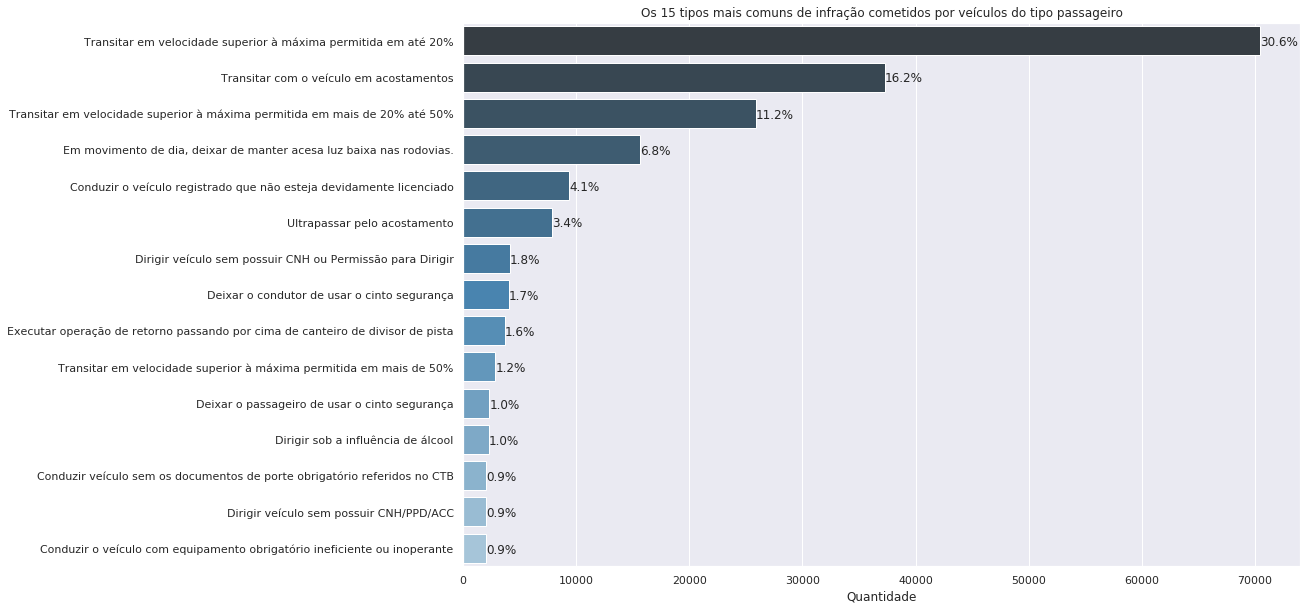

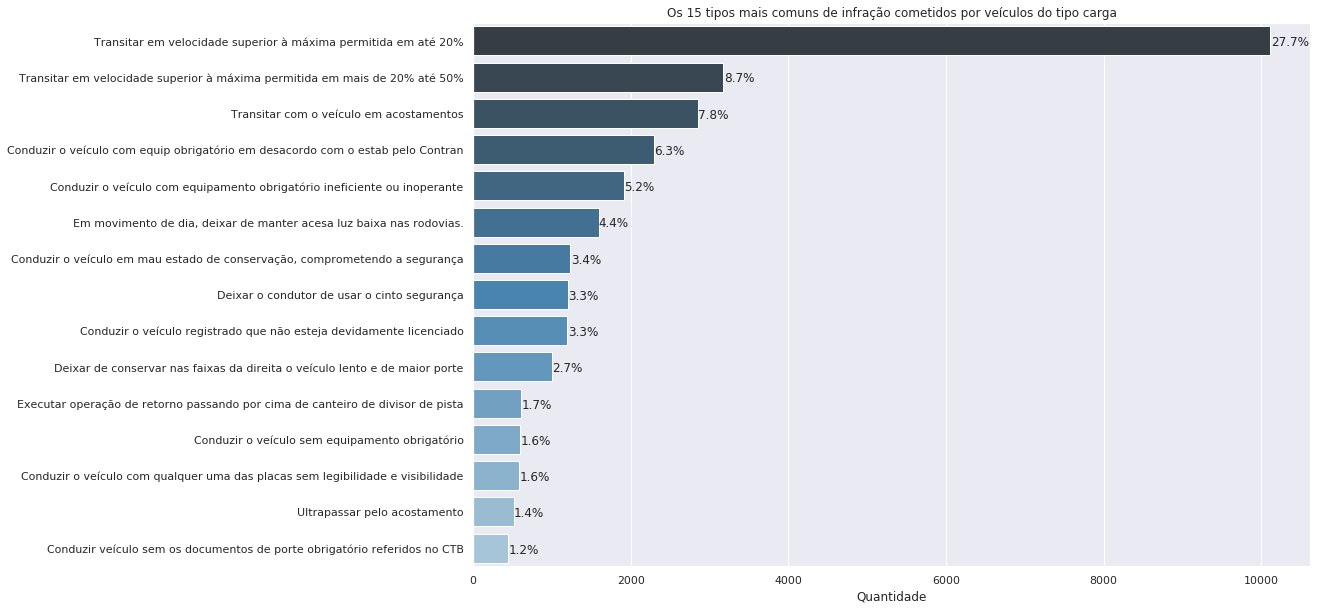

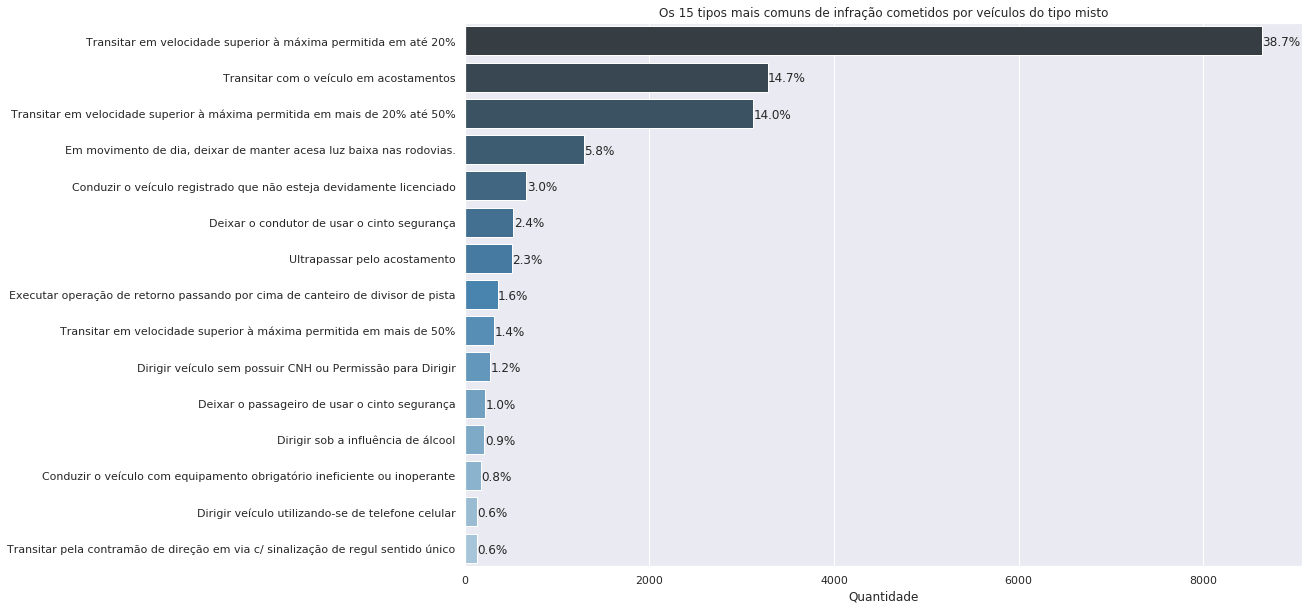

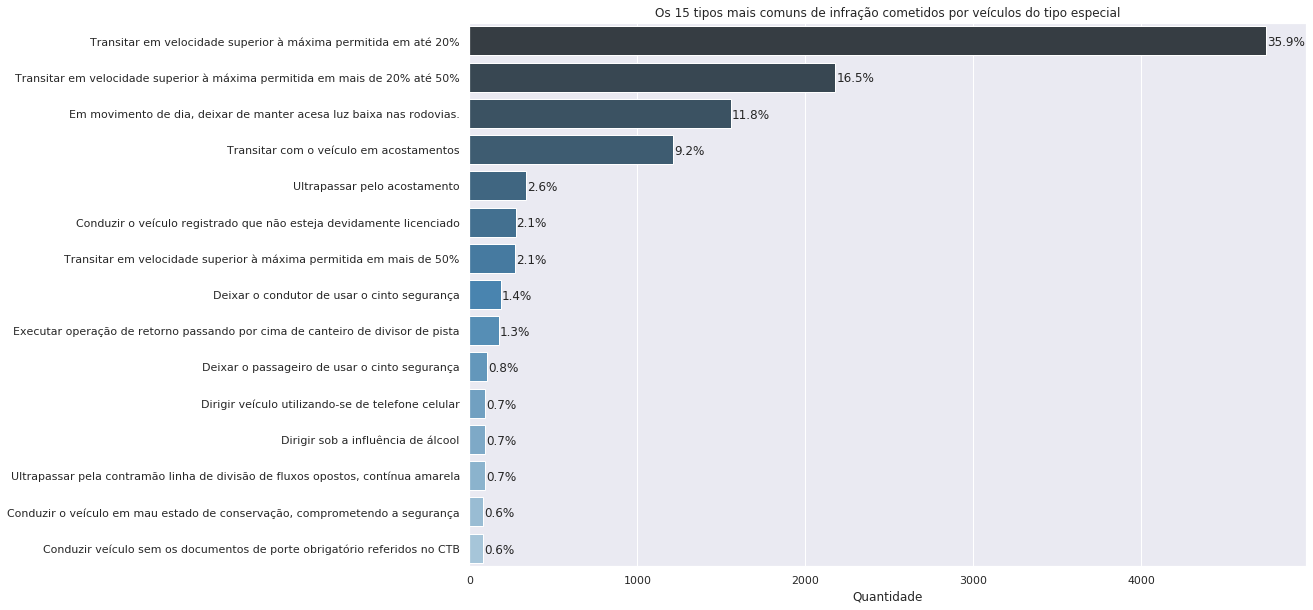

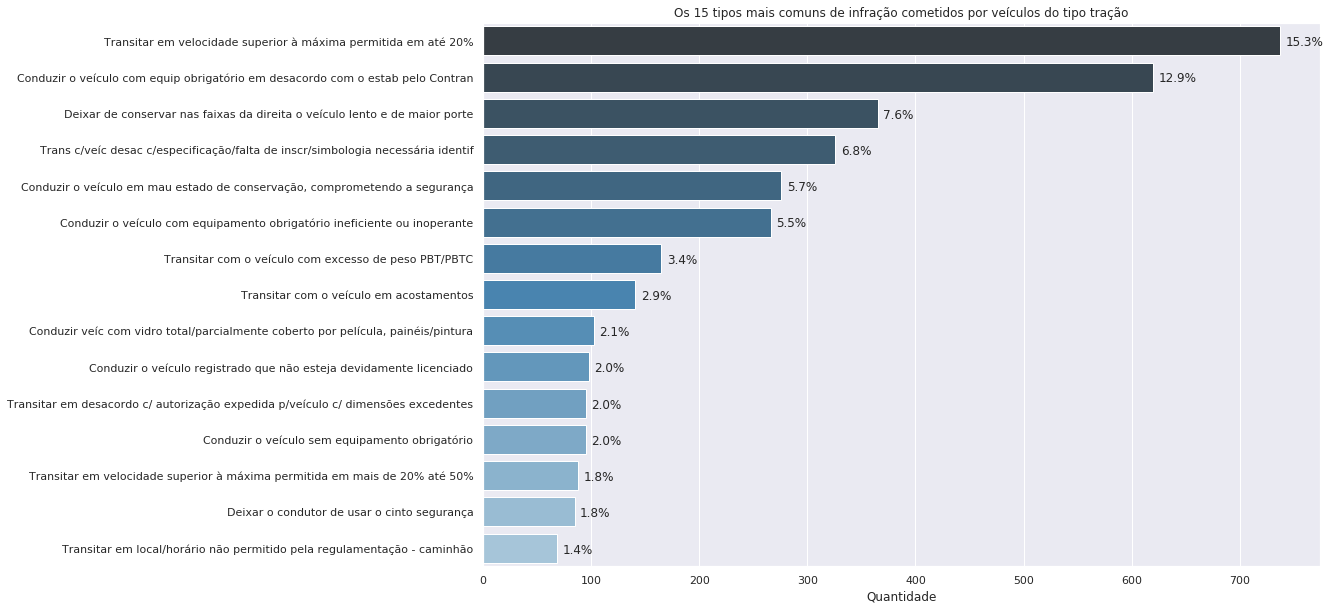

In [24]:
lista_tipos_veiculos = df_infracoes_prf_2010_2018.especie.unique().tolist()
lista_tipos_veiculos.pop() # Retira o ultimo valor da lista, que e nan
plota_infracoes_veiculos(df=df_infracoes_prf_2010_2018,
                         lista_tipos_veiculos=lista_tipos_veiculos,
                         label_tipo_veiculo='especie',
                         label_qtd_infracoes='dat_infracao',
                         label_tipo_infracao='descricao_abreviada')

### Observações

A Polícia Rodoviária Federal, nesse dataset, classificou os veículos de forma diferente do DER, de forma mais simplificada, sendo eles do tipo passageiro, carga, misto, especial e tração. Também há veículos classificados como coleção e competição, mas por terem pouquíssimas amostras foram retirados.  

- __Passageiro:__ Nesse caso se destaca o alto número de infrações por transitar no acostamento, além de excesso de velocidade e deixar de manter a luz baixa nas rodovias.
- __Carga:__ Os tipos de infração mais comum se assemelham com os veículos de passageiro, com exceção de conduzir o veículo sem equipamento obrigatório ou em que eles estejam em desacordo com o estabelecido pelo Contran ou com defeitos/inoperante. Um dos motivos para essa diferença é de que veículos de carga possuam diretrizes mais rígidas relacionadas aos equipamentos obrigatórios.
- __Misto:__ Possui índices muito pŕoximos dos mostrados nos veículos de passageiro.
- __Especial:__ Possui uma distribuição semelhante dos veículos mistos, porém tem uma porcentagem bem maior de infrações por, de dia, transitar sem a luz baixa acesa.  
- __Tração:__ Assim como foi visto no caminhão trator, essa classe é a que tem os tipos de infrações mais bem distribuído. Os tipos mais relevantes nesse caso também estão relacionados aos equipamentos obrigatórios, além daqueles sobre o porte do veículo, como excesso de peso, dimensões excedidas e transitar em local/horário não permitido.  

Comparando com os dados do DER, tem-se que as infrações da PRF realmente estão ligadas às características de uma rodovia, como tráfego pelo acostamento, uso da luz baixa e regras sobre equipamentos obrigatórios. Também é possível notar algumas similaridades com algumas classificações de veículos dos dados do DER, como tração e caminhão trator e caminhão e carga. Já outras delas podem ser mais complicadas de distinguir, tal qual motocicletas e motonetas.